# Exercise 1: Visualization of Linear Classifiers

**Note**: Please insert the names of all participating students:
1. Julia Holzlehner
2. Hendrik Gonschor
3. Christopher Gross

## Preamble
The following code downloads and imports all necessary files and modules into the virtual machine of Colab. Please make sure to execute it before solving this exercise. This mandatory preamble will be found on all exercise sheets.

In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4405.git'
    os.chdir('cs4405')

import numpy as np
from matplotlib import pyplot as plt
from utils import utils_1 as utils

Cloning into 'cs4405'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 134 (delta 38), reused 22 (delta 7), pack-reused 61 (from 1)
Receiving objects: 100% (134/134), 202.58 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (61/61), done.


## Exercise 1.1: Data visualization
The *rows* in matrix `samples` represent $L$ vectors $\boldsymbol{x}_{i} \in \mathbb{R}^{1 \times 2}$. Their corresponding class labels $s_i \in \left\{ -1, 1 \right\}$ are found in `labels` with:

$$
s_i = \left\{
        \begin{array}{rl}
            1 & \mbox{, if } \boldsymbol{x}_{i} \; \text{belongs to class 'blue dots'}\\
            -1 & \mbox{, if } \boldsymbol{x}_{i} \; \text{belongs to class 'red dots'}
        \end{array}
        \right.
$$
**Tasks**:
* Visualize the `samples` according to the `labels` (see `help(plt.plot)`) as blue and red dots.

**Programming Hints**:
* Note that for all exercises we use *row vectors* instead of *column vectors* for convenience with Python.
* To enforce equal axis scaling (i.e. make circles circular), use e.g. `plt.axis('scaled')`

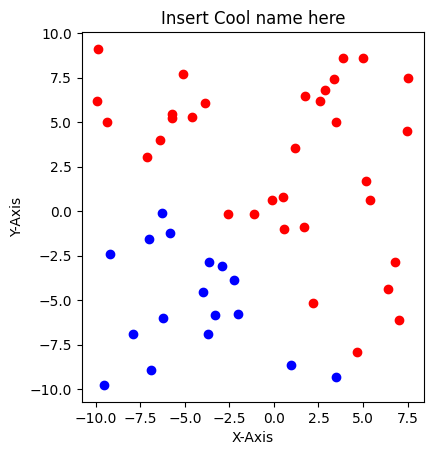

In [2]:
# TODO: implement the function to plot the data
def plot_data(samples, labels):
   # Define the dots
    blue = samples[labels == 1]
    red = samples[labels == -1]

    # Plot the blue and red points
    plt.scatter(blue[:, 0], blue[:, 1], color='blue', label='Blue Dots')
    plt.scatter(red[:, 0], red[:, 1], color='red', label='Red Dots')

    # Scale the Axis
    plt.axis("scaled")

    # Set the Labels
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.title('Insert Cool name here')

    # Show the plot and the Legend
    #plt.legend()
    plt.show()

samples, labels = utils.load_data('data/data_1.npz')
plot_data(samples, labels)

## Exercise 1.2: A linear model of a neuron
We are now looking at a linear model of a neuron without temporal dynamics. In this model, the neuron computes the weighted sum of the `sample` $\boldsymbol{x}_{i} \in \mathbb{R}^{1 \times 2}$ with `weights` $\boldsymbol{w} \in \mathbb{R}^{1 \times 2}$ and compares this sum to a scalar `threshold` $\theta \in \mathbb{R}$. The scalar output value $y_{i}\left( \boldsymbol{x}_{i} \right) \in \left\{ -1, 1 \right\}$, i.e. the `classification` of the neuron, is calculated as follows:

$$
\begin{equation}
    y_{i} \left( \boldsymbol{x}_{i} \right) = \sigma \left( \boldsymbol{x}_{i} \boldsymbol{w}^{T} - \theta \right)
\end{equation}
$$

where

$$
\begin{equation}
    \sigma(x) =
        \left\{
            \begin{array}{rl}
                 1, & \text{if } x\geq 0 \\
                -1, & \text{if } x<0
            \end{array}
        \right.
\end{equation}
$$

**Tasks**:
* Implement a Python function `neuron_classify(samples, weights, threshold)` that uses given `weights` $\boldsymbol{w}$ and `threshold` $\theta$ to compute the `classification` $y_i \left( \boldsymbol{x}_{i} \right)$ for each `sample` $\boldsymbol{x}_{i}$ (see `help(np.matmul)`). The $L$-dimensional output vector $\boldsymbol{y}$ should contain the `classifications` for all `samples` $\boldsymbol{x}_{i}$, $i = 1, \dots, L$.

**Programming Hints**:
* Note that each `sample` represents a *row* in `samples` with the shape `(2,)`.
* Use broadcasting and try to avoid using `for` loops.
* Try different values for $\boldsymbol{w}$ and $\theta$ and visualize the results.

**Questions**:
1. What is the geometrical influence of $\boldsymbol{w}$ and $\theta$ on the classification? What is the relation between the direction of $\boldsymbol{w}$ and the class assignments? What is happening, when you invert the direction of $\boldsymbol{w}$?
2. How do you need to choose $\boldsymbol{w}$ and $\theta$ to get `classifications` for the `samples` that are equal to the real class `labels`?

**Answers**:
1.
2.

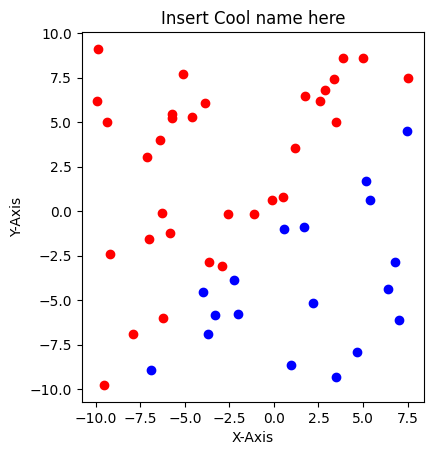

In [6]:
# TODO: function to classify the samples
def neuron_classify(samples, weights, threshold):
    # formular
    sum = np.matmul(samples, weights) - threshold

    # Calc the classification if sum is bigger or equal its 1 if not -1
    classifications = np.where(sum >= 0, 1, -1)

    return classifications

# Define weigths
weights = np.array([1.0, -1.0])

# TODO: define the scalar threshold
threshold = np.array([0.5])

samples, labels = utils.load_data('data/data_1.npz')
classifications = neuron_classify(samples, weights, threshold)
plot_data(samples, classifications)

## Exercise 1.3: Visualization of a neuron's classification boundary
For $d$-dimensional inputs, the `weights` $\boldsymbol{w}$ and `threshold` $\theta$ of the neuron model in Exercise 1.2 characterize a linear ($d$-1)-dimensional hyperplane in $\mathbb{R}^{d}$ as a classification line.

**Tasks**:
* For $\mathbb{R}^{2}$, implement a Python function `plot_classline(weights, threshold)` that plots the exact classification line in an existing Matplotlib figure.
* Combine `plot_classline(weights, threshold)` and the previously implemented function `plot_data(samples, labels)` for the data points from `data_1.npz` to check whether your implementation is correct.

**Programming Hints**:
* First of all: How is the classification line defined? Think of what formula the points located on the line have to fulfill.
* A line is defined by two distinct points. The intersection points of the line with the bounding box, i.e. `x_min`, `x_max`, `y_min`, `y_max`, of the figure could be a good choice (see `help(plt.gca)`, `help(plt.Axes.get_xbound)` and `help(plt.Axes.get_ybound)`).
* Try to avoid a `ZeroDivisionError`.

In [ ]:
# TODO: implement the function to plot the classline
def plot_classline(weights, threshold):
  pass

# TODO: define the weight vector
weights = np.array()

# TODO: define the scalar threshold
threshold = np.array()

samples, labels = utils.load_data('data/data_1.npz')
plot_data(samples, labels)
plot_classline(weights, threshold)